In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("online-shopping.csv")
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


**Perform EDA**




In [3]:
#check shape
df.shape

(52955, 21)

In [4]:
df.describe()

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52955.000000,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,26477.000000,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,15286.936089,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,0.000000,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13238.500000,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26477.000000,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39715.500000,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52954.000000,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [5]:
#check null values

df_isnull = df.isnull().sum()
df_isnull

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [6]:
#deop unnamed column
df.drop(columns = ['Unnamed: 0'],axis = 1,inplace = True)

In [7]:
#drop null values(they are less than 5%)
df.dropna(inplace=True)

In [8]:
df.dtypes

CustomerID             float64
Gender                  object
Location                object
Tenure_Months          float64
Transaction_ID         float64
Transaction_Date        object
Product_SKU             object
Product_Description     object
Product_Category        object
Quantity               float64
Avg_Price              float64
Delivery_Charges       float64
Coupon_Status           object
GST                    float64
Date                    object
Offline_Spend          float64
Online_Spend           float64
Month                    int64
Coupon_Code             object
Discount_pct           float64
dtype: object

In [9]:
#convert date and month to date and time

df['Date'] = pd.to_datetime(df['Date'])
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Month'] = pd.to_datetime(df['Month'])
df['CustomerID'] = df['CustomerID'].astype(int)
df.dtypes

CustomerID                      int32
Gender                         object
Location                       object
Tenure_Months                 float64
Transaction_ID                float64
Transaction_Date       datetime64[ns]
Product_SKU                    object
Product_Description            object
Product_Category               object
Quantity                      float64
Avg_Price                     float64
Delivery_Charges              float64
Coupon_Status                  object
GST                           float64
Date                   datetime64[ns]
Offline_Spend                 float64
Online_Spend                  float64
Month                  datetime64[ns]
Coupon_Code                    object
Discount_pct                  float64
dtype: object

In [10]:
#Add a total sales column
df['Total_Sales'] =df['Quantity'] * df['Avg_Price']


**Analyzing customer behaviour using RFM**

In [11]:
#recent_date  - is the most recent date in my dataset
#recent_date = df['Transaction_Date'].max() + pd.DateOffset(1)


rfm = df.groupby('CustomerID').agg({
    #'Transaction_Date': lambda x: (recent_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Total_Sales': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID','Frequency', 'Monetary']
print(rfm)

      CustomerID  Frequency  Monetary
0          12346          2     30.99
1          12347         59  13812.52
2          12348         23   1442.12
3          12350         17   1360.07
4          12356         36   1442.47
...          ...        ...       ...
1463       18259          6    526.75
1464       18260         39   2316.25
1465       18269          8    101.56
1466       18277          1    298.00
1467       18283        101   6348.37

[1468 rows x 3 columns]


In [12]:
#Ranking
#rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)
#Normalization -converting to %
#rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['M_rank']/rfm['M_rank'].max())*100
 
rfm.drop(columns=['F_rank', 'M_rank'], inplace=True)
rfm

,CustomerID,Frequency,Monetary,F_rank_norm,M_rank_norm
0,12346,2,30.99,6.164850,3.610354
1,12347,59,13812.52,83.038147,97.683924
2,12348,23,1442.12,53.201635,44.822888
3,12350,17,1360.07,43.017711,42.438692
4,12356,36,1442.47,67.881471,44.891008
...,...,...,...,...,...
1463,18259,6,526.75,16.076294,21.117166
1464,18260,39,2316.25,70.027248,59.128065
1465,18269,8,101.56,20.742507,7.493188
1466,18277,1,298.00,2.282016,14.407357


In [13]:
rfm['RFM_Score'] = 0.43 * rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
 

rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)
rfm[['CustomerID','RFM_Score']]
sorted_rfm = rfm[['CustomerID', 'RFM_Score']].sort_values(by='RFM_Score', ascending=False)
sorted_rfm.head()

,CustomerID,RFM_Score
736,15311,5.00
118,12748,5.00
643,14911,4.99
563,14606,4.99
1355,17841,4.99


In [14]:
bins = [0, 1, 3, 4,float('inf')]
labels = ['Lost Customers', 'Low Value Customers', 'Medium Value Customer', 
          'High value Customer']
rfm['Customer_segment'] = pd.cut(rfm['RFM_Score'], bins=bins, labels=labels)
rfm.head()

,CustomerID,Frequency,Monetary,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,12346,2,30.99,6.16,3.61,0.24,Lost Customers
1,12347,59,13812.52,83.04,97.68,4.57,High value Customer
2,12348,23,1442.12,53.20,44.82,2.42,Low Value Customers
3,12350,17,1360.07,43.02,42.44,2.13,Low Value Customers
4,12356,36,1442.47,67.88,44.89,2.74,Low Value Customers


In [15]:
# Filter the DataFrame to only include Lost Customers
lost_customers = rfm[rfm['Customer_segment'] == 'Lost Customers']

# Calculate the mean for Recency, Frequency, and Monetary columns
lost_customers[['Frequency', 'Monetary']].describe()




,Frequency,Monetary
count,269.000000,269.000000
mean,3.773234,192.038848
std,2.652208,172.766808
min,1.000000,1.000000
25%,2.000000,43.620000
50%,3.000000,148.460000
75%,5.000000,286.970000
max,12.000000,759.390000


In [16]:

#recency_mode = lost_customers['Recency'].mode()
frequency_mode =lost_customers['Frequency'].mode()
monetary_mode =lost_customers['Monetary'].mode()

#print("Mode of Recency:", recency_mode.iloc[0] if not recency_mode.empty else "No mode")
print("Mode of Frequency:", frequency_mode.iloc[0] if not frequency_mode.empty else "No mode")
print("Mode of Monetary:", monetary_mode.iloc[0] if not monetary_mode.empty else "No mode")

Mode of Frequency: 1
Mode of Monetary: 119.0


In [17]:
Low_value = rfm[rfm['Customer_segment'] == 'Low Value Customers']

#recency_mode = Low_value['Recency'].mode()
frequency_mode =Low_value['Frequency'].mode()
monetary_mode =Low_value['Monetary'].mode()

#print("Mode of Recency:", recency_mode.iloc[0] if not recency_mode.empty else "No mode")
print("Mode of Frequency:", frequency_mode.iloc[0] if not frequency_mode.empty else "No mode")
print("Mode of Monetary:", monetary_mode.iloc[0] if not monetary_mode.empty else "No mode")

Mode of Frequency: 16
Mode of Monetary: 150.16


In [18]:
Low_value[['Frequency', 'Monetary']].describe()

,Frequency,Monetary
count,623.000000,623.000000
mean,16.747994,1306.484157
std,7.534213,644.864395
min,3.000000,150.160000
25%,11.000000,808.530000
50%,16.000000,1203.760000
75%,21.000000,1756.215000
max,48.000000,3820.010000


In [19]:
medium_value = rfm[rfm['Customer_segment'] == 'Medium Value Customer']


print(medium_value[[ 'Frequency', 'Monetary']].describe())


        Frequency     Monetary
count  297.000000   297.000000
mean    40.535354  3508.914512
std     11.093564   911.629454
min     15.000000  1610.430000
25%     32.000000  2867.800000
50%     40.000000  3367.760000
75%     48.000000  4095.690000
max     84.000000  6791.940000


In [20]:
#recency_mode = medium_value['Recency'].mode()
frequency_mode =medium_value['Frequency'].mode()
monetary_mode =medium_value['Monetary'].mode()

#print("Mode of Recency:", recency_mode.iloc[0] if not recency_mode.empty else "No mode")
print("Mode of Frequency:", frequency_mode.iloc[0] if not frequency_mode.empty else "No mode")
print("Mode of Monetary:", monetary_mode.iloc[0] if not monetary_mode.empty else "No mode")

Mode of Frequency: 52
Mode of Monetary: 1610.43


In [21]:
high_value = rfm[rfm['Customer_segment'] == 'High value Customer']

high_value[['Frequency', 'Monetary']].describe()

,Frequency,Monetary
count,279.000000,279.000000
mean,104.071685,9806.020789
std,81.432643,8394.743102
min,35.000000,3979.980000
25%,63.000000,5937.100000
50%,79.000000,7518.380000
75%,115.500000,10478.955000
max,682.000000,75009.770000


In [22]:
#recency_mode = high_value['Recency'].mode()
frequency_mode =high_value['Frequency'].mode()
monetary_mode =high_value['Monetary'].mode()

#print("Mode of Recency:", recency_mode.iloc[0] if not recency_mode.empty else "No mode")
print("Mode of Frequency:", frequency_mode.iloc[0] if not frequency_mode.empty else "No mode")
print("Mode of Monetary:", monetary_mode.iloc[0] if not monetary_mode.empty else "No mode")

Mode of Frequency: 76
Mode of Monetary: 3979.98


C:\Users\User\AppData\Local\Temp\ipykernel_10352\2033309455.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


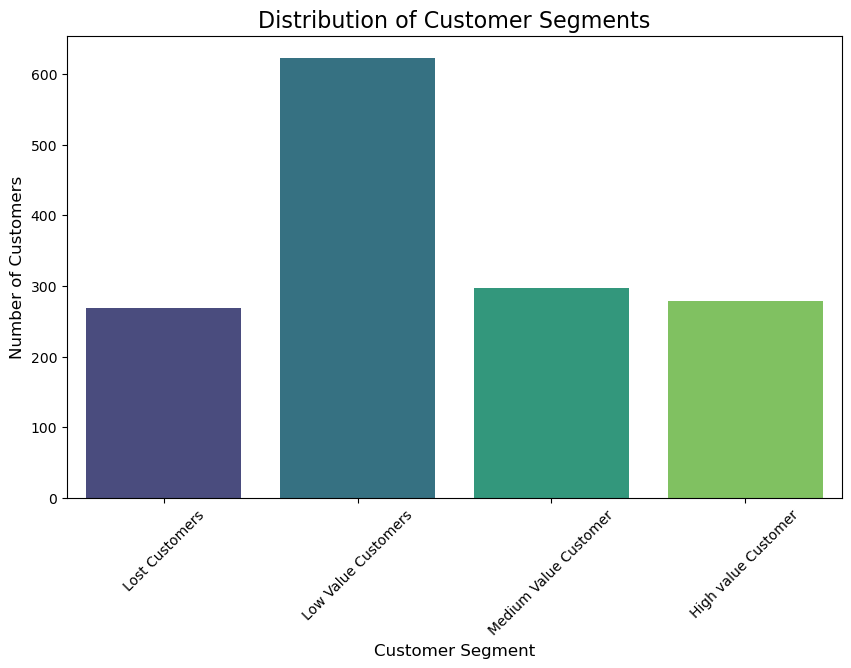

In [23]:
#VISUALIZE
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of customers in each segment
segment_counts = rfm['Customer_segment'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Customer Segments', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.show()


In [24]:
rfm.head()

,CustomerID,Frequency,Monetary,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,12346,2,30.99,6.16,3.61,0.24,Lost Customers
1,12347,59,13812.52,83.04,97.68,4.57,High value Customer
2,12348,23,1442.12,53.20,44.82,2.42,Low Value Customers
3,12350,17,1360.07,43.02,42.44,2.13,Low Value Customers
4,12356,36,1442.47,67.88,44.89,2.74,Low Value Customers


In [25]:
df_selected = df[['CustomerID','Location']]
rfm_selected = rfm[['CustomerID', 'Customer_segment']]

# Merge the selected columns on 'Customer_ID'
merged_df = pd.merge(df_selected, rfm_selected, on='CustomerID', how='inner')

print(merged_df)


       CustomerID    Location       Customer_segment
0           17850     Chicago    High value Customer
1           17850     Chicago    High value Customer
2           17850     Chicago    High value Customer
3           17850     Chicago    High value Customer
4           17850     Chicago    High value Customer
...           ...         ...                    ...
52519       13155  California    High value Customer
52520       18077     Chicago    High value Customer
52521       16085  California    Low Value Customers
52522       16085  California    Low Value Customers
52523       13659     Chicago  Medium Value Customer

[52524 rows x 3 columns]


In [26]:
df.to_csv('df.csv',index=False)

In [27]:
rfm.to_csv('rfm.csv',index=False)

In [28]:
merged_df.to_csv('merged.csv',index=False)